# Project One - Spaceship Titanic Classification 
#### Ilyas Saoud
#### ASU - DAT 402
#### Professor Marko Samara

In this project, I am solving the Kaggle Spaceship Titanic classification competition. This data set can be found on Kaggle's competitions page: https://www.kaggle.com/competitions/spaceship-titanic; Hosted by Kaggle. This data set was inspired by the original "Titanic" competition. This is a classification problem where we predict whether passengers were transported or not. There are some categorical variables, and so I used some preprocessing methods, feature engineering, and hyperparameter tuning to reach a decent accuracy level. 

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import math
import statistics as stt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('../input/spaceship-titanic/train.csv') 
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Let's see how many null values we have for each variable
I will drop Null rows because we will still have a significant amount of data left. Otherwise we could fill Null rows with their column mean value.


In [3]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
df.dropna(axis = 0, inplace=True)

# Feature Engineering & PreProcessing

#### Transported is our target variable. 

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['Transported']= label_encoder.fit_transform(df['Transported'])

In [6]:
df['Cabin1'] = df['Cabin'].str[0] + df['Cabin'].str[-1]
df['Cabin'] = pd.to_numeric(df['Cabin'].str.extract('/(\d+)/', expand=False))
df['last_name'] = df["Name"].str.split(" ", n = 1, expand = True)[1]
df['fam_count'] = df.groupby('last_name')['last_name'].transform('count') + 1
df['total_spent'] = df.RoomService + df.FoodCourt + df.ShoppingMall + df.Spa
df['wealthy'] = df['total_spent'].apply(lambda x: True if x > np.mean(df.total_spent) else False)
df.drop(["last_name","Name"], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,fam_count,total_spent,wealthy
0,0001_01,Europa,False,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,BP,2,0.0,False
1,0002_01,Earth,False,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,FS,4,692.0,False
2,0003_01,Europa,False,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,AS,6,10334.0,True
3,0003_02,Europa,False,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,AS,6,4983.0,True
4,0004_01,Earth,False,1,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,FS,6,1089.0,False


#### Let's get our data ready for a correlation matrix

In [7]:
train_le = df.copy()
for i in list(train_le.columns):
    train_le[i] = label_encoder.fit_transform(train_le[i].values)
    
train_le.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,fam_count,total_spent,wealthy
0,0,1,0,0,2,39,0,0,0,0,0,0,0,2,0,0,0
1,1,0,0,0,2,24,0,107,9,25,424,44,1,11,2,450,0
2,2,1,0,0,2,58,1,43,1044,0,1101,49,0,1,4,2103,1
3,3,1,0,0,2,33,0,0,723,311,996,180,0,1,4,1843,1
4,4,0,0,1,2,16,0,257,69,144,437,2,1,11,4,775,0


### Correlation heatmap using Seaborn

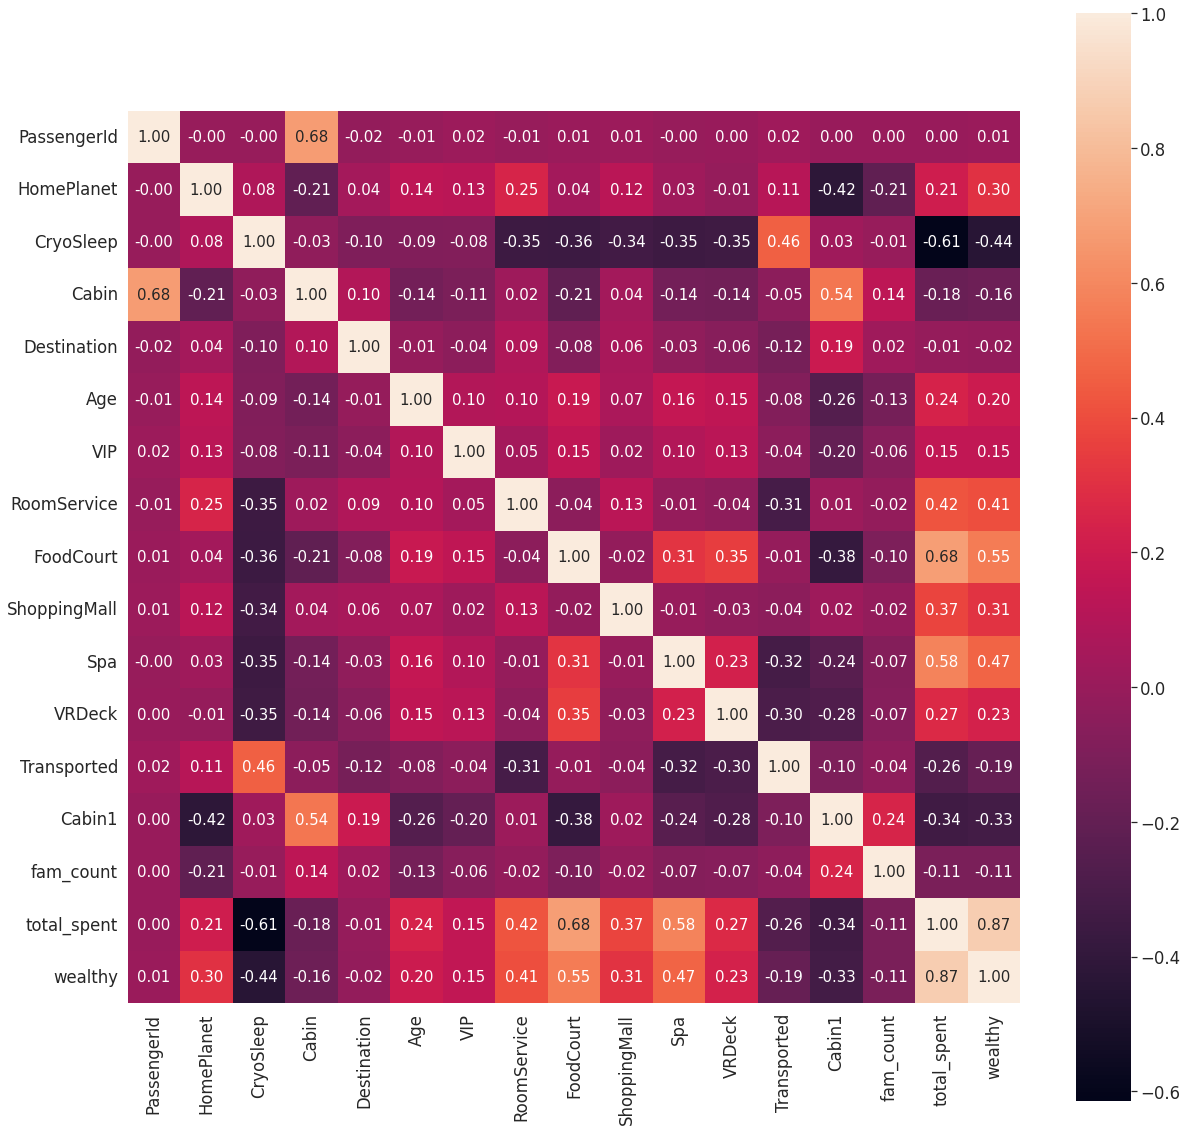

In [8]:
cols = list(train_le.columns)
cm = np.corrcoef(train_le[cols].values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20,20))
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols,
                ax=ax)
plt.show()

## HotEncoding our categorical variables, then Normalizing our data.

In [9]:
train_dum = pd.get_dummies(df,drop_first=True)
train_dum.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,fam_count,total_spent,...,Cabin1_CS,Cabin1_DP,Cabin1_DS,Cabin1_EP,Cabin1_ES,Cabin1_FP,Cabin1_FS,Cabin1_GP,Cabin1_GS,Cabin1_TP
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,2,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1,4,692.0,...,0,0,0,0,0,0,1,0,0,0
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,6,10334.0,...,0,0,0,0,0,0,0,0,0,0
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,6,4983.0,...,0,0,0,0,0,0,0,0,0,0
4,1,16.0,303.0,70.0,151.0,565.0,2.0,1,6,1089.0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
transported = train_dum.iloc[:,7]
train_dum.drop(["Transported"],axis=1,inplace=True)

In [11]:
mms = MinMaxScaler()
train_norm = mms.fit_transform(train_dum)
train_norm

array([[0.        , 0.49367089, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30379747, 0.0109879 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.73417722, 0.00433468, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79197466, 0.32911392, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.32101373, 0.40506329, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32101373, 0.55696203, 0.01270161, ..., 0.        , 0.        ,
        0.        ]])

### Splitting our data for training and testing. I used Sklearn to do so. 

In [12]:
X,y = train_norm, transported.values
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.3,
                                                random_state=0,
                                                stratify=y)
X_train.shape,X_test.shape

((4624, 6635), (1982, 6635))

# Hyperparameter K tuning!
## Using a loop similar to the one used in class to find the best value K. This also collects our RMSE which we will plot next. 

In [13]:
kvec = np.array(range(1,100))
nk=len(kvec)

train_RMSE = np.zeros(nk)
test_RMSE = np.zeros(nk)


for i in range(1,nk):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    kmod = neigh.predict(X_test)
    kmodtr = neigh.predict(X_train)
    
    train_RMSE[i] = math.sqrt(sum((y_train-kmodtr)**2)/len(y_train))
    test_RMSE[i] = math.sqrt(sum((y_test-kmod)**2)/len(y_train))
    print("k = ",i,"test RMSE= ", test_RMSE[i], "train RMSE= ", train_RMSE[i])

k =  1 test RMSE=  0.3581116371142918 train RMSE=  0.0
k =  2 test RMSE=  0.3417338246653603 train RMSE=  0.3829181343026923
k =  3 test RMSE=  0.3375953024484999 train RMSE=  0.37579212762295994
k =  4 test RMSE=  0.3314537549877837 train RMSE=  0.42059851900220857
k =  5 test RMSE=  0.3337295799385358 train RMSE=  0.4198265418711823
k =  6 test RMSE=  0.3294905368001188 train RMSE=  0.44093130442838085
k =  7 test RMSE=  0.33047360373888574 train RMSE=  0.4384721034081051
k =  8 test RMSE=  0.32586058538471085 train RMSE=  0.4508738151987027
k =  9 test RMSE=  0.32685457016018926 train RMSE=  0.45159272155247315
k =  10 test RMSE=  0.32486355932903704 train RMSE=  0.4580121030116893
k =  11 test RMSE=  0.3251962409925879 train RMSE=  0.4561194829197301
k =  12 test RMSE=  0.325528582664392 train RMSE=  0.45966175317905245
k =  13 test RMSE=  0.32817520006502054 train RMSE=  0.4638767733996325
k =  14 test RMSE=  0.3265235781055076 train RMSE=  0.46341033107613916
k =  15 test RMSE=  

# Plotting our MRSRE

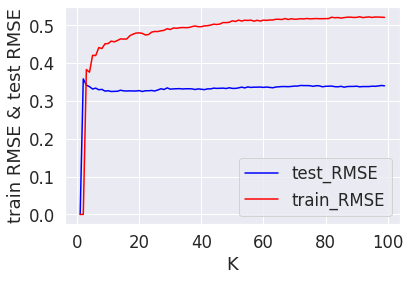

In [14]:
plt.plot(kvec, test_RMSE, color="blue", label="test_RMSE")
plt.plot(kvec, train_RMSE, color="red",label="train_RMSE")
rcParams['figure.figsize'] = 15,10

plt.legend(loc="lower right")
plt.xlabel("K")
plt.ylabel("train RMSE & test RMSE")
plt.show(fig)

### Finding the best K value.

In [15]:
kbest = np.argmin(test_RMSE[1:])
kbest

9

### Let's use k=9 to fit our model

In [16]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

# Our model accuracy

In [17]:
print("The accuracy level for our model is:", round(neigh.score(X_test,y_test),3))

The accuracy level for our model is: 0.751


# Final thoughts
In the future, I would like to see how reducing our dimensions can affect our model accuracy, by exploring and keeping the best features. I would also like to write my own code from scratch and test out a higher range of k values, but this is limited because it is computationally expensive. I look forward to learning more about different algorithms, and to our next project.